# Results for Logistic Regression on Principal Components

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [3]:
import os
import pickle
import numpy as np
from scipy import sparse
from sklearn.externals import joblib
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from midi_ml.models.decomposition import PrincipalComponents
from midi_ml.models.linear_decision_rules import PenalizedLogisticRegression

In [4]:
labels = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_labels.pkl")
features = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_matrix.pkl")
features = features.todense()
bach_labels = [k for k in range(len(labels)) if labels[k] == "bach-js"]
mozart_labels = [k for k in range(len(labels)) if labels[k] == "mozart"]
X = features[bach_labels + mozart_labels].A
y = np.array([1 for i in range(len(bach_labels))] + [0 for i in range(len(mozart_labels))])
y = y.reshape((y.shape[0],))
del features

# How Many PCs to Keep?

In [5]:
pc = PrincipalComponents(X, method="svd")
pc.fit()

In [60]:
import seaborn as sns

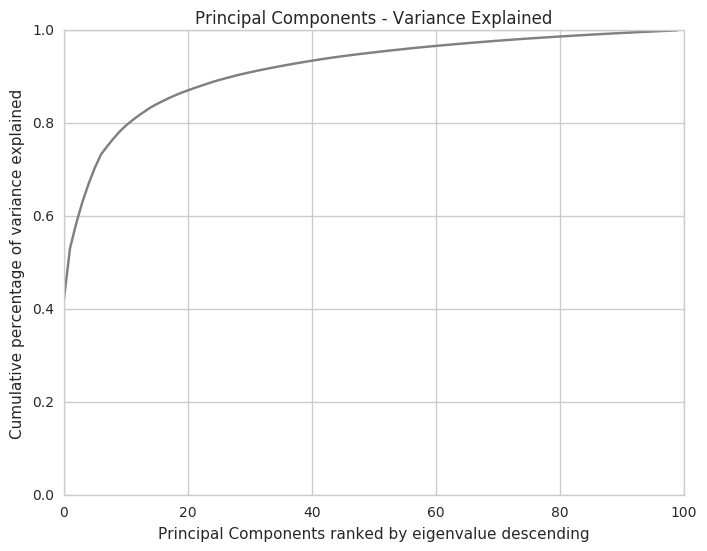

In [66]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.plot((pc.eigenvalues_.cumsum() / pc.eigenvalues_.sum())[:100],
        color="gray")
plt.ylim(0,1)
plt.ylabel("Cumulative percentage of variance explained")
plt.xlabel("Principal Components ranked by eigenvalue descending")
plt.title("Principal Components - Variance Explained")
plt.show()

In [7]:
NUM_COMPONENTS=100

# Train Models

In [8]:
regularization_parameter = 10
predicted = []
actuals = []
pc_models = []
lr_models = []
i = 0
for train_idx, test_idx in KFold(n=X.shape[0], n_folds=5, shuffle=True):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    pc = PrincipalComponents(X_train, method="svd", keep_copy_of_X=False, num_components=NUM_COMPONENTS)
    
    try:
        pc.fit()
    except:
        continue

    lr = PenalizedLogisticRegression(pc.transform(X_train), y_train, l2_penalty=regularization_parameter)
    
    try:
        lr.fit()
    except:
        continue
    
    preds = (lr.predict_probabilities(pc.transform(X_test)) > 0.5).astype(int)
    predicted.append(preds)
    actuals.append(y_test)
    pc_models.append(pc)
    lr_models.append(lr)
    pickle.dump(pc_models, open("./dumps/pca/logistic/pc_model_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(lr_models, open("./dumps/pca/logistic/lr_model_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(predicted, open("./dumps/pca/logistic/predicted_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(actuals, open("./dumps/pca/logistic/actuals_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    i += 1

Model-fitting complete
Model-fitting complete
Model-fitting complete
Model-fitting complete
Model-fitting complete


In [28]:
regularization_parameter = 1
predicted = []
actuals = []
pc_models = []
lr_models = []
i = 0
for train_idx, test_idx in KFold(n=X.shape[0], n_folds=5, shuffle=True):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    pc = PrincipalComponents(X_train, method="svd", keep_copy_of_X=False, num_components=NUM_COMPONENTS)
    
    try:
        pc.fit()
    except:
        continue

    lr = PenalizedLogisticRegression(pc.transform(X_train), y_train, l2_penalty=regularization_parameter)
    
    try:
        lr.fit()
    except:
        continue
    
    preds = (lr.predict_probabilities(pc.transform(X_test)) > 0.5).astype(int)
    predicted.append(preds)
    actuals.append(y_test)
    pc_models.append(pc)
    lr_models.append(lr)
    pickle.dump(pc_models, open("./dumps/pca/logistic/pc_model_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(lr_models, open("./dumps/pca/logistic/lr_model_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(predicted, open("./dumps/pca/logistic/predicted_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(actuals, open("./dumps/pca/logistic/actuals_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    i += 1

Model-fitting complete
Model-fitting complete
Model-fitting complete
Model-fitting complete
Model-fitting complete


In [34]:
regularization_parameter = 0.1
predicted = []
actuals = []
pc_models = []
lr_models = []
i = 0
for train_idx, test_idx in KFold(n=X.shape[0], n_folds=5, shuffle=True):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    pc = PrincipalComponents(X_train, method="svd", keep_copy_of_X=False, num_components=NUM_COMPONENTS)
    
    try:
        pc.fit()
    except:
        continue

    lr = PenalizedLogisticRegression(pc.transform(X_train), y_train, l2_penalty=regularization_parameter)
    
    try:
        lr.fit()
    except:
        continue
    
    preds = (lr.predict_probabilities(pc.transform(X_test)) > 0.5).astype(int)
    predicted.append(preds)
    actuals.append(y_test)
    pc_models.append(pc)
    lr_models.append(lr)
    pickle.dump(pc_models, open("./dumps/pca/logistic/pc_model_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(lr_models, open("./dumps/pca/logistic/lr_model_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(predicted, open("./dumps/pca/logistic/predicted_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(actuals, open("./dumps/pca/logistic/actuals_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    i += 1

Model-fitting complete
Model-fitting complete
Model-fitting complete
Model-fitting complete
Model-fitting complete


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

In [11]:
model_folder = "./dumps/pca/logistic/"
os.listdir(model_folder)

['actuals_fold_4_reg_100.pkl',
 'pc_model_fold_0_reg_10.pkl',
 'pc_model_fold_3_reg_1000.pkl',
 'lr_model_fold_2.pkl',
 'lr_model_fold_1_reg_1000.pkl',
 'predicted_fold_0.pkl',
 'actuals_fold_4_reg_1000.pkl',
 'actuals_fold_3_reg_1000.pkl',
 'pc_model_fold_1_reg_1000.pkl',
 'pc_model_fold_1.pkl',
 'pc_model_fold_2_reg_100.pkl',
 'actuals_fold_4_reg_10.pkl',
 'predicted_fold_0_reg_100.pkl',
 'actuals_fold_2.pkl',
 'lr_model_fold_3_reg_1000.pkl',
 'actuals_fold_2_reg_1000.pkl',
 'predicted_fold_1.pkl',
 'actuals_fold_3_reg_100.pkl',
 'actuals_fold_2_reg_10.pkl',
 'pc_model_fold_3_reg_100.pkl',
 'predicted_fold_1_reg_10.pkl',
 'pc_model_fold_4.pkl',
 'lr_model_fold_3.pkl',
 'predicted_fold_4_reg_10.pkl',
 'lr_model_fold_4_reg_100.pkl',
 'lr_model_fold_2_reg_1000.pkl',
 'lr_model_fold_4_reg_10.pkl',
 'predicted_fold_2_reg_1000.pkl',
 'pc_model_fold_1_reg_100.pkl',
 'predicted_fold_2_reg_100.pkl',
 'pc_model_fold_3.pkl',
 'actuals_fold_4.pkl',
 'lr_model_fold_1.pkl',
 'predicted_fold_3_reg_

In [48]:
regularizations = [0.1, 1, 10]

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [50]:
accuracy = {reg: [] for reg in regularizations}
precision = {reg: [] for reg in regularizations}
recall = {reg: [] for reg in regularizations}
f1 = {reg: [] for reg in regularizations}
mcc = {reg: [] for reg in regularizations}
for reg in regularizations:
    print("Regularization: %s" % reg)
    predicted = pickle.load(open(model_folder + "predicted_fold_4_reg_%s.pkl" % reg, 'rb'))
    actuals = pickle.load(open(model_folder + "actuals_fold_4_reg_%s.pkl" % reg, 'rb'))
    for pred, actual in zip(predicted, actuals):
        print("confusion matrix")
        print(confusion_matrix(actual, pred))
        print("\taccuracy")
        acc = accuracy_score(actual, pred)
        accuracy[reg].append(acc)
        print("\t\t", acc)
        print("\tf1")
        f = f1_score(actual, pred)
        f1[reg].append(f)
        print("\t\t", f)
        print("\trecall")
        r = recall_score(actual, pred)
        recall[reg].append(r)
        print("\t\t", r)
        print("\tprecision")
        p = precision_score(actual, pred)
        precision[reg].append(p)
        print("\t\t", p)
        print("\tmcc")
        m = matthews_corrcoef(actual, pred)
        mcc[reg].append(m)
        print("\t\t", m)


    print("\n\n\n\n")

Regularization: 0.1
confusion matrix
[[ 96  36]
 [ 15 459]]
	accuracy
		 0.915841584158
	f1
		 0.947368421053
	recall
		 0.96835443038
	precision
		 0.927272727273
	mcc
		 0.742315580928
confusion matrix
[[109  38]
 [ 12 447]]
	accuracy
		 0.917491749175
	f1
		 0.947033898305
	recall
		 0.97385620915
	precision
		 0.921649484536
	mcc
		 0.767046586883
confusion matrix
[[110  38]
 [ 11 446]]
	accuracy
		 0.919008264463
	f1
		 0.947927736451
	recall
		 0.975929978118
	precision
		 0.921487603306
	mcc
		 0.772871156373
confusion matrix
[[105  39]
 [  9 452]]
	accuracy
		 0.920661157025
	f1
		 0.949579831933
	recall
		 0.980477223427
	precision
		 0.920570264766
	mcc
		 0.772821160524
confusion matrix
[[ 93  47]
 [ 11 454]]
	accuracy
		 0.904132231405
	f1
		 0.939958592133
	recall
		 0.976344086022
	precision
		 0.90618762475
	mcc
		 0.716080914351





Regularization: 1
confusion matrix
[[ 95  38]
 [ 11 462]]
	accuracy
		 0.919141914191
	f1
		 0.94964028777
	recall
		 0.976744186047
	prec

In [58]:
reg = 10
print(np.min(accuracy[reg]))
print(np.mean(accuracy[reg]))
print(np.max(accuracy[reg]))

0.894214876033
0.91113165862
0.919141914191


In [47]:
reg = 10
print(np.min(accuracy[reg]))
print(np.mean(accuracy[reg]))
print(np.max(accuracy[reg]))

KeyError: 10